In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

In [2]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Visible range\valores_VIS.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Spatial range\values_SPA.xlsx")

VIS_data

,Emitted wavelength,Observed wavelength,Flux,Velocity,2nd Derivate,3rd Derivate,Blueshift
0,4060.8601,4060.8637,0.319656,-367,516.240027,0.002124,265.769522
1,4068.4198,4068.4255,0.209893,-213,305.398066,-0.005535,420.019834
2,4080.9899,4080.9941,0.214181,-324,412.428492,-0.004021,308.535026
3,4086.1573,4086.1634,0.220922,-185,317.419952,-0.005171,447.543709
4,4088.2476,4088.2510,0.288719,-384,466.796632,0.000710,249.323049
...,...,...,...,...,...,...,...
614,10425.8870,10425.8953,0.865886,-394,27.385089,-0.014712,238.663377
615,10426.6020,10426.6082,0.828438,-455,34.097704,0.004307,178.266442
616,10535.1220,10535.1327,0.693736,-329,48.369722,0.005233,304.484305
617,10580.0390,10580.0488,0.901829,-355,15.526598,-0.144127,277.689533


In [13]:
#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown']

### Behavior for the spatial and the atlas spectra with chromocharacterization

I follow the characterization that made Ellwarth for both data and fit an second order polynomial fit.

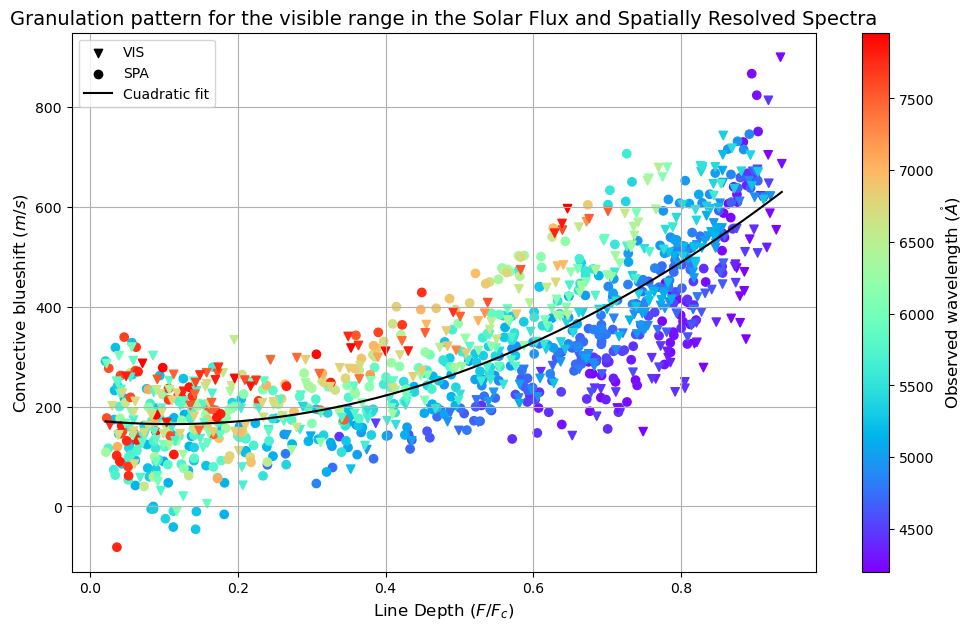

In [ ]:
#Granulation pattern
fig1, ax = plt.subplots(1,1,figsize=(12,7))

pol = Polynomial.fit(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0),pd.concat([VIS_data['Blueshift'],SPA_data['Blueshift']],axis=0), 2)
param = pol.convert().coef
values_flux = np.linspace(min(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0)), max(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0)), len(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0)))
flux_fit = poly.polyval(values_flux,param)

scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Blueshift'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
scatter = ax.scatter(1-SPA_data['Flux'],SPA_data['Blueshift'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

#For the legend
ax.scatter([],[],marker='v',color='k',label='VIS')
ax.scatter([],[],marker='o',color='k',label='SPA')

#Plot the "general" fit
ax.plot(values_flux,flux_fit,color='k',label='Cuadratic fit')

ax.set_title('Granulation pattern for the visible range in the Solar Flux and Spatially Resolved Spectra',fontsize=14)
ax.set_xlabel(r'Line Depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Convective blueshift $(m/s)$',fontsize=12)
ax.legend()
ax.grid()

# fig1.savefig('ConvectiveBlueshift.png')

### Give a second order polynomial fit for each color

In [33]:
#Separate for range in colors
values_VIS = [ VIS_data[VIS_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]

values_SPA = [SPA_data[SPA_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]


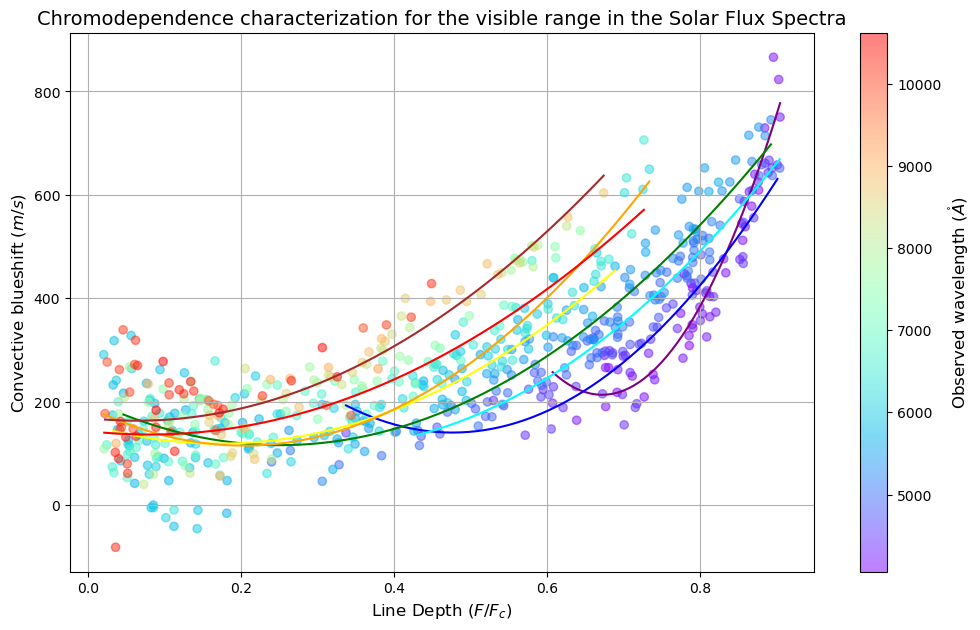

In [ ]:
#List for the data
param_VIS = []
fit_VIS= []

#Granulation pattern
fig1, ax = plt.subplots(1,1,figsize=(12,7))

#Plot the cuadratic fit for each color
for i in range(0,len(values_VIS)):  
    
    pol = Polynomial.fit(1-values_VIS[i]['Flux'], values_VIS[i]['Blueshift'], 2)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_VIS[i]['Flux']), max(1-values_VIS[i]['Flux']), len(1-values_VIS[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(values_flux,flux_fit, color=colors_fit[i])

    param_VIS.append(pd.DataFrame(param))
    fit_VIS.append([values_flux,flux_fit])

scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Blueshift'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o', alpha=0.5)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)


ax.set_title('Chromodependence characterization for the visible range in the Solar Flux Spectra',fontsize=14)
ax.set_xlabel(r'Line Depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Convective blueshift $(m/s)$',fontsize=12)
ax.grid()

# fig1.savefig('Chromocharacterization_VIS.png')

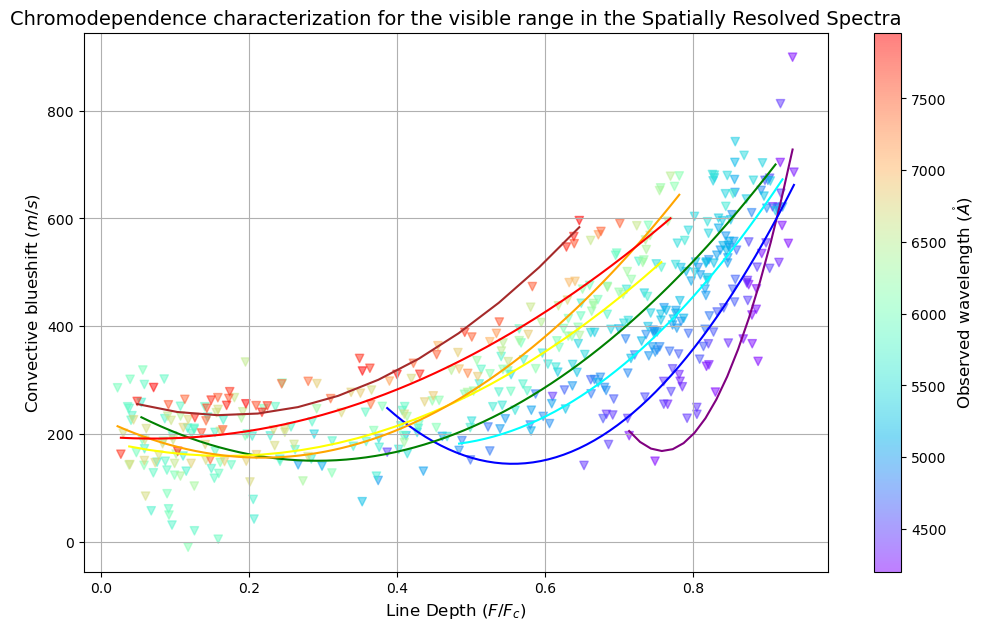

In [ ]:
#List for the data
param_SPA = []
fit_SPA = []

#Granulation pattern
fig1, ax = plt.subplots(1,1,figsize=(12,7))

#Plot the cuadratic fit for each color
for i in range(0,len(values_SPA)):  
    
    pol = Polynomial.fit(1-values_SPA[i]['Flux'], values_SPA[i]['Blueshift'], 2)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_SPA[i]['Flux']), max(1-values_SPA[i]['Flux']), len(1-values_SPA[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(values_flux,flux_fit, color=colors_fit[i])

    param_SPA.append(pd.DataFrame(param))
    fit_SPA.append([values_flux,flux_fit])

scatter = ax.scatter(1-SPA_data['Flux'],SPA_data['Blueshift'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v', alpha=0.5)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)


ax.set_title('Chromodependence characterization for the visible range in the Spatially Resolved Spectra',fontsize=14)
ax.set_xlabel(r'Line Depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Convective blueshift $(m/s)$',fontsize=12)
ax.grid()

# fig1.savefig('Chromocharacterization_SPA.png')

### Check if there's a relation between the coefficients from the fits

In [28]:
#Calculate te average and show the parameters
parameters_VIS = pd.concat(param_VIS,axis=1)
parameters_VIS = parameters_VIS.set_axis(colors_fit, axis=1)
parameters_VIS = parameters_VIS.T.set_axis(['ax^2','bx','c'],axis=1)

parameters_SPA = pd.concat(param_SPA,axis=1)
parameters_SPA = parameters_SPA.set_axis(colors_fit, axis=1)
parameters_SPA = parameters_SPA.T.set_axis(['ax^2','bx','c'],axis=1)

# parameters_VIS
parameters_SPA

,ax^2,bx,c
purple,10599.620709,-27487.902370,18109.135055
blue,1254.213699,-3986.754745,3582.032288
cyan,598.148587,-1899.779770,2150.366536
green,272.301311,-834.576136,1430.312726
yellow,188.833536,-348.547495,1036.116392
orange,228.526058,-665.028627,1531.184313
red,195.708702,-115.570313,833.207629
brown,276.610916,-501.652587,1511.339241


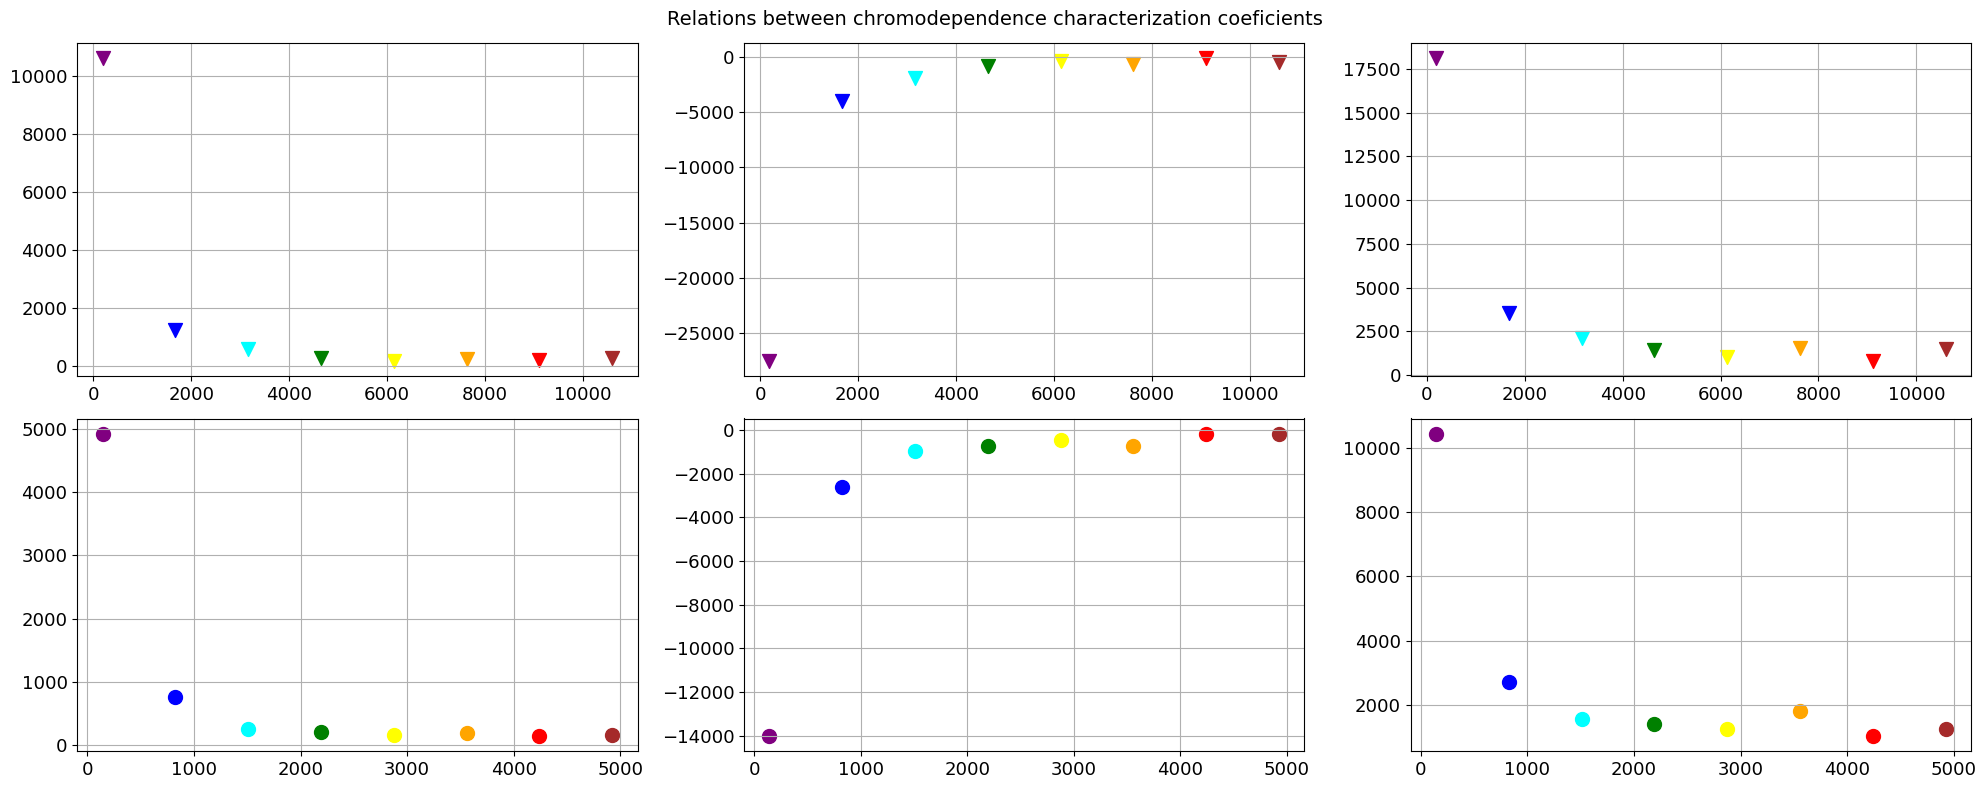

In [43]:
fig4, axis1 = plt.subplots(2,3, figsize = (20, 8))
ax1 = axis1[0,0]
ax2 = axis1[0,1]
ax3 = axis1[0,2]
ax4 = axis1[1,0]
ax5 = axis1[1,1]
ax6 = axis1[1,2]

fig4.suptitle(r'Relations between chromodependence characterization coeficients',fontsize=14)

for i in range(0,len(parameters_SPA['ax^2'])):
    values_flux = np.linspace(min(parameters_SPA['ax^2']), max(parameters_SPA['ax^2']), len(parameters_SPA['ax^2']))

    ax1.scatter(values_flux[i],parameters_SPA['ax^2'].iloc[i],color= colors_fit[i],s=100,marker='v')
    ax2.scatter(values_flux[i],parameters_SPA['bx'].iloc[i],color= colors_fit[i],s=100,marker='v')
    ax3.scatter(values_flux[i],parameters_SPA['c'].iloc[i],color= colors_fit[i],s=100,marker='v')

for i in range(0,len(parameters_VIS['ax^2'])):
    values_flux = np.linspace(min(parameters_VIS['ax^2']), max(parameters_VIS['ax^2']), len(parameters_VIS['ax^2']))

    ax4.scatter(values_flux[i],parameters_VIS['ax^2'].iloc[i],color= colors_fit[i],s=100,marker='o')
    ax5.scatter(values_flux[i],parameters_VIS['bx'].iloc[i],color= colors_fit[i],s=100,marker='o')
    ax6.scatter(values_flux[i],parameters_VIS['c'].iloc[i],color= colors_fit[i],s=100,marker='o')

ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

ax2.grid()
ax2.tick_params(axis='both',labelsize=13)

ax3.grid()
ax3.tick_params(axis='both',labelsize=13)

ax4.grid()
ax4.tick_params(axis='both',labelsize=13)

ax5.grid()
ax5.tick_params(axis='both',labelsize=13)

ax6.grid()
ax6.tick_params(axis='both',labelsize=13)

fig4.tight_layout()

# fig4.savefig('Relation_coef.png')

In [30]:
#I try to divide them for the general data coeficients to see the number relations
parameters_VIS['A^2'] = (parameters_VIS['ax^2']/param[0])
parameters_VIS['B'] = (parameters_VIS['bx']/param[1])
parameters_VIS['C'] = (parameters_VIS['c']/param[2])

parameters_SPA['A^2'] = (parameters_SPA['ax^2']/param[0])
parameters_SPA['B'] = (parameters_SPA['bx']/param[1])
parameters_SPA['C'] = (parameters_SPA['c']/param[2])

#The graphics seems to give an 1/1-ax relation. I made it up
def func(x,A):
    return 1/(1-A*x)

x_new = np.linspace(0,0.9,len(parameters_VIS['B'])) #A general wave-relation

popt_VIS, pcov = curve_fit(func,xdata=x_new, ydata=parameters_VIS['A^2'])
A1_VIS = popt_VIS[0]
popt1_VIS, pcov = curve_fit(func,xdata=x_new, ydata=parameters_VIS['B'])
A2_VIS = popt1_VIS[0]
popt2_VIS, pcov = curve_fit(func,xdata=x_new, ydata=parameters_VIS['C'])
A3_VIS = popt2_VIS[0]

popt_SPA, pcov = curve_fit(func,xdata=x_new, ydata=parameters_SPA['A^2'])
A1_SPA = popt_SPA[0]
popt1_SPA, pcov = curve_fit(func,xdata=x_new, ydata=parameters_SPA['B'])
A2_SPA = popt1_SPA[0]
popt2_SPA, pcov = curve_fit(func,xdata=x_new, ydata=parameters_SPA['C'])
A3_SPA = popt2_SPA[0]

parameters_VIS

,ax^2,bx,c,A^2,B,C
purple,4924.205256,-14022.706361,10434.978277,29.250393,86.428197,8.197078
blue,757.096602,-2590.735673,2719.884050,4.497248,15.967860,2.136574
cyan,263.343534,-974.510908,1574.359799,1.564293,6.006346,1.236720
green,204.879875,-709.607005,1413.546014,1.217012,4.373625,1.110395
yellow,155.980681,-432.949509,1256.076020,0.926545,2.668461,0.986696
orange,190.192763,-739.924830,1818.162629,1.129769,4.560487,1.428237
red,142.964850,-166.150359,1039.856131,0.849229,1.024059,0.816847
brown,168.346633,-162.246893,1273.011937,1.000000,1.000000,1.000000


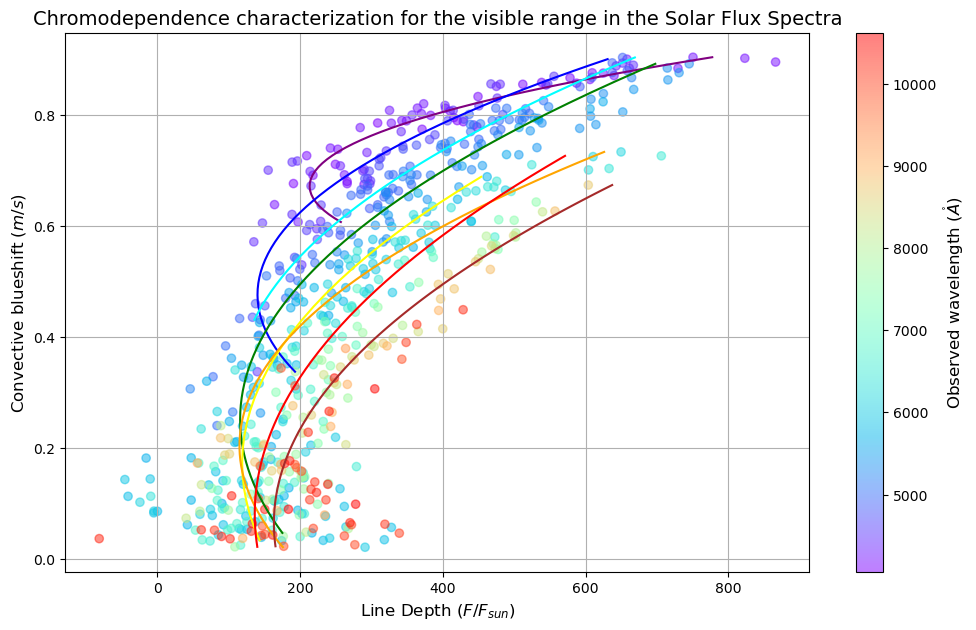

In [36]:
#List for the data
param_VIS = []
fit_VIS= []

#Granulation pattern
fig1, ax = plt.subplots(1,1,figsize=(12,7))

#Plot the cuadratic fit for each color
for i in range(0,len(values_VIS)):  
    
    pol = Polynomial.fit(1-values_VIS[i]['Flux'], values_VIS[i]['Blueshift'], 2)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_VIS[i]['Flux']), max(1-values_VIS[i]['Flux']), len(1-values_VIS[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(flux_fit,values_flux, color=colors_fit[i])

    param_VIS.append(pd.DataFrame(param))
    fit_VIS.append([values_flux,flux_fit])

scatter = ax.scatter(VIS_data['Blueshift'],1-VIS_data['Flux'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o', alpha=0.5)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)


ax.set_title('Chromodependence characterization for the visible range in the Solar Flux Spectra',fontsize=14)
ax.set_xlabel(r'Line Depth $(F/F_{sun})$',fontsize=12)
ax.set_ylabel(r'Convective blueshift $(m/s)$',fontsize=12)
ax.grid()

# fig1.savefig('ConvectiveBlueshift.png')

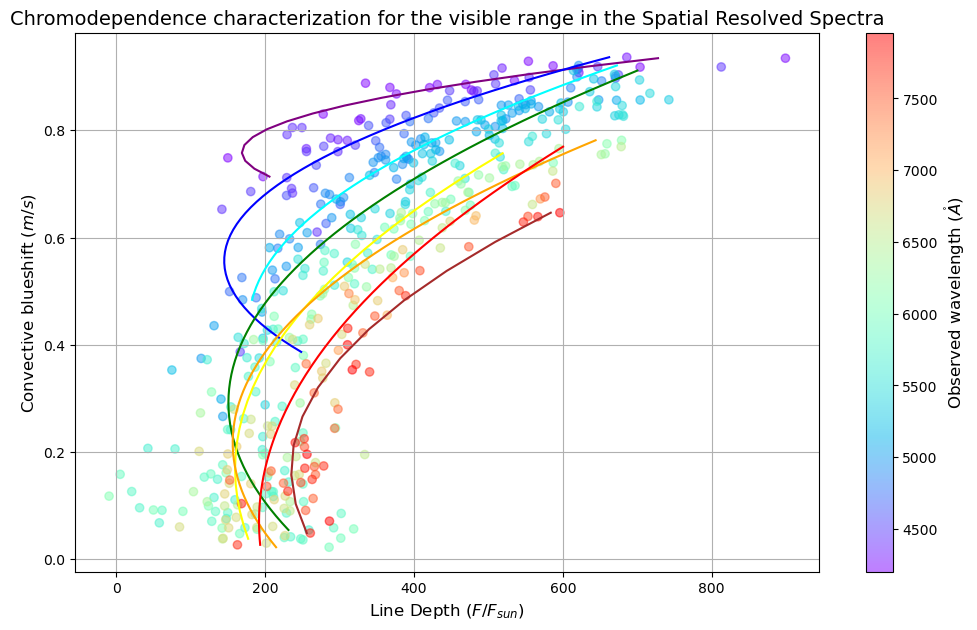

In [ ]:
#List for the data
param_SPA = []
fit_SPA = []

#Granulation pattern
fig1, ax = plt.subplots(1,1,figsize=(12,7))

#Plot the cuadratic fit for each color
for i in range(0,len(values_SPA)):  
    
    pol = Polynomial.fit(1-values_SPA[i]['Flux'], values_SPA[i]['Blueshift'], 2)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_SPA[i]['Flux']), max(1-values_SPA[i]['Flux']), len(1-values_SPA[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(flux_fit,values_flux, color=colors_fit[i])

    param_VIS.append(pd.DataFrame(param))
    fit_VIS.append([values_flux,flux_fit])

scatter = ax.scatter(SPA_data['Blueshift'],1-SPA_data['Flux'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v', alpha=0.5)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)


ax.set_title('Chromodependence characterization for the visible range in the Spatial Resolved Spectra',fontsize=14)
ax.set_xlabel(r'Line Depth $(F/F_{sun})$',fontsize=12)
ax.set_ylabel(r'Convective blueshift $(m/s)$',fontsize=12)
ax.grid()

# fig1.savefig('ConvectiveBlueshift.png')

## Conclusion

I have a relation dependent of the color, I gonna to try a general characterization. But I see with Benjamin that there's not a pronounced chromodependence in the Infrared part of the specra, just going to the blue...
#### The deeper lines, coming from the spatially center of the sun, are affected by the differential rotation significantly than highest lines